# News Sentiment Demo
Also scratch space 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import re 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import altair as alt 

from util import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

## On Individual Words...

In [3]:
sample_path = os.path.join('data/archive', 'df_1920.csv')
sample_data = open(sample_path, 'r').read()
sample_data[:100]

',year,sentence\n0,1920,"ROME, Jan. 2.--It is of the utmost importance that the Flume local situation '

In [4]:
# count_words_by_year 
count_words_by_year(1920)

new                     20501
will                    19520
yesterday               12641
today                   12063
no                      10298
                        ...  
ifproposal                  1
brokenpromises              1
cuddled                     1
thetus                      1
inmatescommunicating        1
Length: 70407, dtype: int64

In [5]:
# document_frequency 
print(document_frequency(1920, 'yesterday'))
print(document_frequency(1920, 'today'))

0.09131404785434073
0.06955050459677178


We see right away although yesterday and today do not differ much in total occurrence, they have huge difference in the proportion of appearance in each news report. 

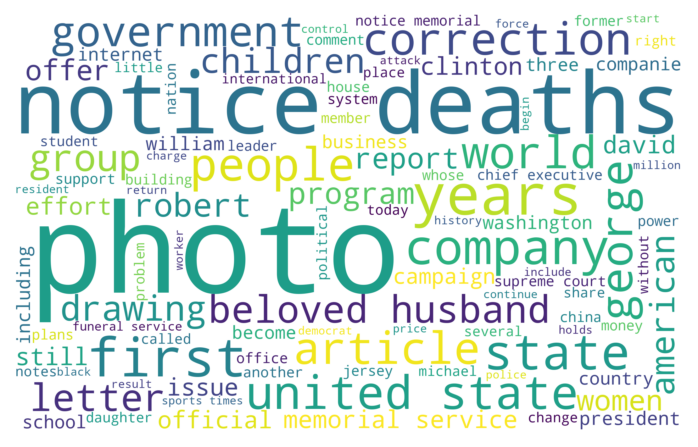

In [6]:
# example 
plot_word_cloud_of_year(2000)
# TODO: fit into a picture? Possibly the United States map? 

## Correlation of sentiments and timbre

In [6]:
# explore correlation 
corr_mat = corr_timbre_nltk()
corr_mat

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,TimbreAvg12
neg,-0.639401,-0.736728,0.718850,0.115234,-0.095456,0.672712,-0.714234,0.588452,-0.029635,0.516729,-0.092706,0.364870
neu,-0.310147,-0.296859,0.316419,-0.002898,0.040573,0.375960,-0.162540,0.155160,0.135685,-0.088109,-0.330981,0.323990
pos,-0.371222,-0.592693,0.431657,0.010339,-0.122481,0.409507,-0.501249,0.507008,-0.151351,0.506329,0.010316,0.199022
compound,0.533164,0.599942,-0.579723,-0.046728,0.031239,-0.597924,0.484162,-0.428740,-0.055827,-0.233315,0.262062,-0.402498


In [7]:
# visualize corrlations 
corr_mat_long = corr_mat.reset_index().melt('index', var_name = "TimbreCorr", value_name = "Correlation").rename(columns={'index': 'sentiment'})
corr_mat_long.head()

,sentiment,TimbreCorr,Correlation
0,neg,TimbreAvg1,-0.639401
1,neu,TimbreAvg1,-0.310147
2,pos,TimbreAvg1,-0.371222
3,compound,TimbreAvg1,0.533164
4,neg,TimbreAvg2,-0.736728


In [8]:
# visualize correlations 
sentiment_cat = ['neg', 'neu', 'pos', 'compund']
timbre_cols = [f'TimbreAvg{i}' for i in range(1, 13)]
alt.Chart(corr_mat_long).mark_rect().encode(
    y=alt.Y('sentiment:O', sort=sentiment_cat),
    x=alt.X('TimbreCorr:O', sort=timbre_cols),
    tooltip=['sentiment', 'TimbreCorr', 'Correlation'],
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme="redblue"))  # TODO: do you like this colormap? red means something bad, blue means something good, maybe?
).properties(
    title='Correlation Between Timbre Avgs and Sentiment',
    width=500, height=150
)

alt.Chart(...)

Observations: 
- Timbre 2 is negatively correlated with both negative and positive sentiment (hmmmmmmmm)
- Timbre 3 is strongly positively correlated with negative emotion (as expected!), and negatively correlated with compound emotion. 

Question to explore in presentation: 
- For the first four timbre averages, which sentiment is it strongly/negatively positvely correlated to?
- For each sentiment, which Timbre features is it closely related to?